In [3]:
%pip install pandas
%pip install scipy
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 5.5 MB/s eta 0:00:0000:0100:01


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn import datasets,  linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

ModuleNotFoundError: No module named 'matplotlib'

In [177]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

In [178]:
X.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})


,age,sex,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [179]:
X['sex'] = X['sex'].replace({1:'male', 2:'female'}).astype('category')


In [180]:
X = pd.get_dummies(X, columns=['sex'], prefix='sex', dtype='float', drop_first=True)

In [192]:
X.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_male
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,0.531674
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,0.499561
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,0.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,0.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,1.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,1.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,1.000000


In [181]:
X.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_male
0,59.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,0.0
1,48.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,1.0
2,72.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,0.0
3,24.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,1.0
4,50.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,1.0


In [191]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Regression Assumptions:
- residuals have a mean of zero
- normality of errors
- residuals are not autocorrelated
- need linear relationships
- need more data than variables
- no excessive multicollinearity

Challenges of Multiple Regression:
- visual examination becomes more difficult
- multicollinearity
- interactions
- attributing importance to each variable
- juggling multiple problems all at once

Checking Assumptions:
- "put all the relevant variables in the model"
    - check to see if the residuals plot show a random pattern
    - check for the presence of interactions
- "leave the irrelevant variables out"
    - check for the significance of each indiv variable and check the partial plots for each indiv var
- "need linear relationships"
    - use curve estimation and scatter plots to diagnose (e.g. squaring a variable)
- residuals have a mean of zero
- normality of errors-ish
    - check for normality of indiv vars using Levene's test before building the model
    - check for normaily of residuals after builiding
    - check the mean error of the residuals
- multicollinearity
    - correlation matrix before you model
    - collinearity diagnostics after you model (e.g. variance inflation factor, tolerance)
- serial autocorrelation (time series data)
    - durbin-watson test



In [183]:
reg = linear_model.LinearRegression(fit_intercept=True)


In [184]:
reg.fit(X, y)


LinearRegression()

In [189]:
coef = pd.DataFrame(data=reg.coef_.reshape(1,-1), columns=reg.feature_names_in_)
print(coef.T.rename(columns={0:'coef'}))
print(f'Intercept: {reg.intercept_}')

               coef
age       -0.036361
bmi        5.602962
bp         1.116808
s1        -1.089996
s2         0.746450
s3         0.372005
s4         6.533832
s5        68.483125
s6         0.280117
sex_male  22.859648
Intercept: -380.2864346997827


In [198]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [241]:
df = pd.merge(X, y, left_index=True, right_index=True)

df = df.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})

df

,age,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level,sex_male,target
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,0.0,151.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,1.0,75.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,0.0,141.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,1.0,206.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,1.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,0.0,178.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,0.0,104.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,0.0,132.0
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,1.0,220.0


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='bp', ylabel='age'>,
        <Axes: xlabel='s1', ylabel='age'>,
        <Axes: xlabel='s2', ylabel='age'>,
        <Axes: xlabel='s3', ylabel='age'>,
        <Axes: xlabel='s4', ylabel='age'>,
        <Axes: xlabel='s5', ylabel='age'>,
        <Axes: xlabel='s6', ylabel='age'>,
        <Axes: xlabel='sex_male', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='bp', ylabel='bmi'>,
        <Axes: xlabel='s1', ylabel='bmi'>,
        <Axes: xlabel='s2', ylabel='bmi'>,
        <Axes: xlabel='s3', ylabel='bmi'>,
        <Axes: xlabel='s4', ylabel='bmi'>,
        <Axes: xlabel='s5', ylabel='bmi'>,
        <Axes: xlabel='s6', ylabel='bmi'>,
        <Axes: xlabel='sex_male', ylabel='bmi'>,
        <Axes: xlabel='target', ylabel='bmi'>],
       [<Axes: xlabel='age',

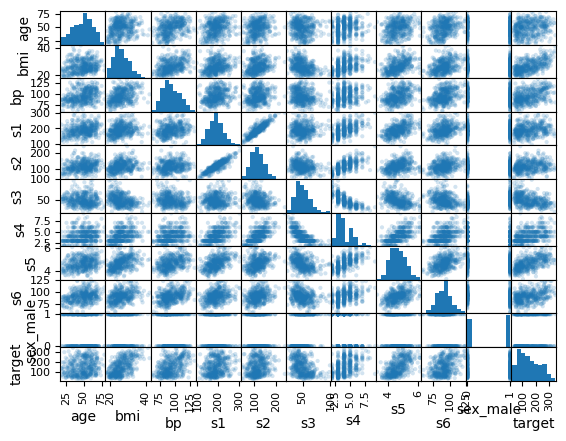

In [206]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [256]:
df.columns[4]

'low density lipoproteins'

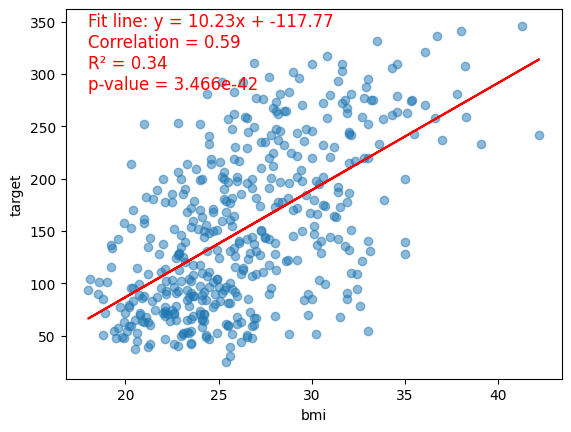

In [267]:
x_axis_dim = df[df.columns[1]]
y_axis_dim = df['target']

# Create the scatter plot
plt.scatter(x_axis_dim, y_axis_dim, alpha=0.5)

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis_dim, y_axis_dim)

# Add the fit line to the scatter plot
plt.plot(x_axis_dim, slope * x_axis_dim + intercept, color='red')

# Add labels
plt.xlabel(x_axis_dim.name)
plt.ylabel(y_axis_dim.name)

# Create the equation string
equation_text = f'Fit line: y = {slope:.2f}x + {intercept:.2f}'
r_text = f'Correlation = {r_value:.2f}'
r2_text = f'R² = {r_value**2:.2f}'
pvalue_text = f'p-value = {p_value:.3e}'

# Set initial position for text
x_position = x_axis_dim.min()
y_position = y_axis_dim.max()

# Add the equation, R², and p-value to the plot as text, with different y positions
plt.text(x_position, y_position, equation_text, color='red', fontsize=12)
plt.text(x_position, y_position - 20, r_text, color='red', fontsize=12)
plt.text(x_position, y_position - 40, r2_text, color='red', fontsize=12)
plt.text(x_position, y_position - 60, pvalue_text, color='red', fontsize=12)

# Show plot
plt.show()
